# (Discrete)TIME SERIES ANALYSIS OF A SALE EXAMPLE

Content
1. Collecting the data
2. Exploratory data analysis
3.Time Series Models
4. Feature engineering
5. Modeling & Evaluation

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
plt.rc('lines', linewidth=10, color='b')

In [2]:
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=12)   # fontsize of the figure title
plt.rc('lines', linewidth=4, color='k')
plt.rcParams['figure.figsize']=(16,8)
Set1=['Red', 'Yellow', 'Navy', 'pink','purple','black','Blue']

In [3]:
sales=pd.read_excel('Superstore.xls')
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


# Groubpy()

In [4]:
#W=sales.groupby('Category')
#W.get_group('Office Supplies')
#W.head()

In [5]:
#sales.columns

In [6]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
#No. of classes in the 'Category'
(sales['Category'].nunique(),sales['Category'].unique())

(3, array(['Furniture', 'Office Supplies', 'Technology'], dtype=object))

In [9]:
# just let's look on the Furnitures 
furniture_sales=sales.loc[sales['Category'] == 'Furniture']

furniture_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [10]:
furniture_sales = furniture_sales.set_index('Order Date')
furniture_sales.head(4)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [11]:
pd.to_datetime(furniture_sales.index)

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [12]:
#rearranging the order-date column: ascending
furniture_sales=furniture_sales.sort_values('Order Date', ascending=True)
furniture_sales.tail(3)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,5132,CA-2017-146626,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
2017-12-29,7636,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
2017-12-30,907,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


# Visualization Time Serie Sale of Furnitures

In [13]:
#Time interval ranges:
furniture_sales.index.min(), furniture_sales.index.max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
# let's resample the date into the monthly orders as we have a 3-years interval

In [15]:
y=furniture_sales['Sales'].resample('M').mean()
#y['2014']

In [16]:
y['2017'].mean()

304.1388734044811

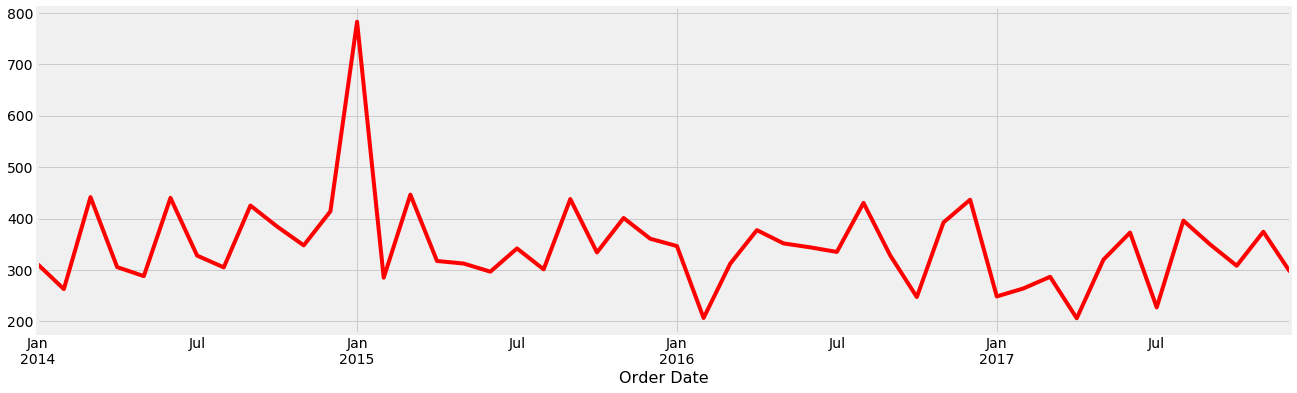

In [17]:
y.plot(figsize=(20,6), color='red')
plt.show()

We can also visualize our data using a method called time-series decomposition
that allows us to decompose our time series into 
three distinct components: trend, seasonality, and noise.

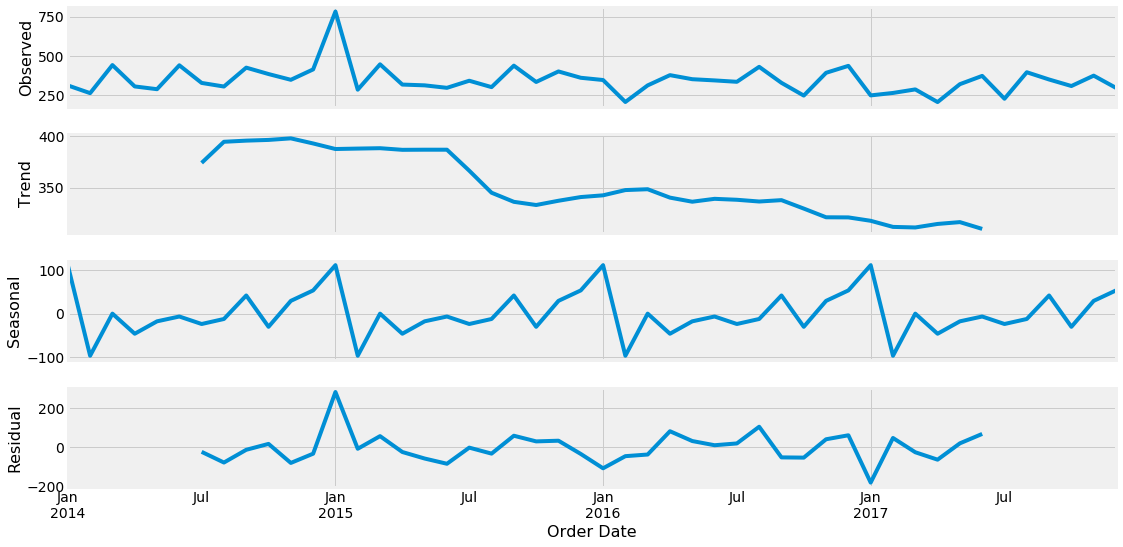

In [18]:
plt.rc('font', size=20)  
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

# ARIMA

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1455.1440917235866
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1303.957427877853


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666292
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364603


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1545941087665
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2639.3686634001656
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662502013
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269639644
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1559.504361793293
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.35521367347195
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1332.0552908978998
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476943
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.8964721447207
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2731.3766242947445
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.87269899060743
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.18397927249293
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3046.314872159731
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:273.4032454636189
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:592.7661498749849
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1237.7066994604202
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.7241159738327
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:420.4114538992047


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1450.2534541494829
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:273.58403955659355
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2719417804237
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2608.6859035320144
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:418.5261783089188
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:422.40035833230024


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2552.355832114264
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:275.4775740530955
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.5211872508684
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1164.0068253049853
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:430.3305770817938
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:397.36689816515513


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1284.1910359897865
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:273.4415398792931
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:540.6257368397361
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2505.898397470554
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:414.77261730419
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:391.8303255732829
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2402.9120482106755
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:263.93710843812715


C:\Users\behodi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9743   6.86e-05   9.22e+07      0.000    6323.974    6323.974


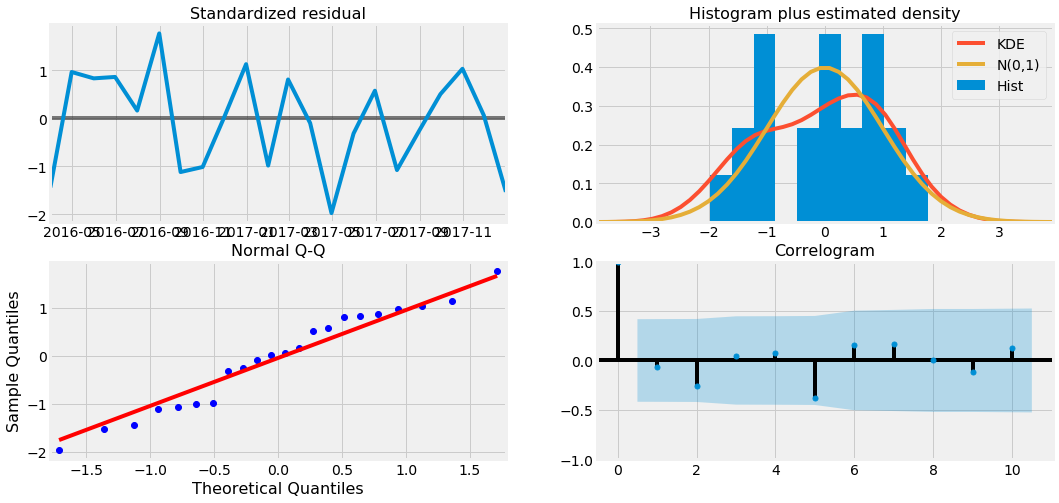

In [67]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [68]:
y

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
2014-06-30    440.204187
2014-07-31    327.910636
2014-08-31    305.014437
2014-09-30    425.294300
2014-10-31    384.507719
2014-11-30    347.820527
2014-12-31    414.134682
2015-01-31    782.662773
2015-02-28    284.943091
2015-03-31    446.420821
2015-04-30    317.445409
2015-05-31    312.498350
2015-06-30    296.699192
2015-07-31    341.860500
2015-08-31    301.206006
2015-09-30    437.883717
2015-10-31    334.072875
2015-11-30    401.049773
2015-12-31    360.715925
2016-01-31    346.488318
2016-02-29    206.607947
2016-03-31    312.221756
2016-04-30    377.488286
2016-05-31    351.624070
2016-06-30    343.962421
2016-07-31    335.090231
2016-08-31    430.456286
2016-09-30    328.468445
2016-10-31    247.345354
2016-11-30    392.390479
2016-12-31    436.651369
2017-01-31    248.501333
2017-02-28    264.089900
2017-03-31    286.669600
2017-04-30    

# Prophet

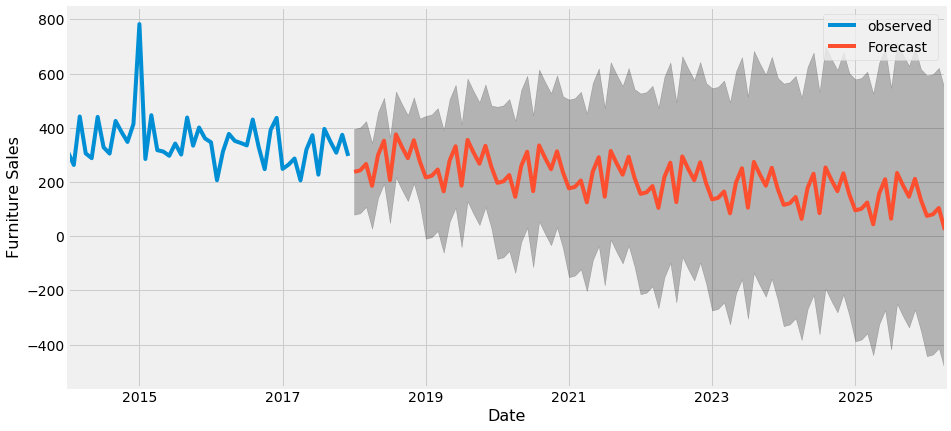

In [66]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
from itertools import product

print (list(product([1,2,3],repeat = 2)))
#[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]